## KEYSTONE PROJECT by PETER REPPEN



#### Importing Libraries

In [9]:
# import librairies
# environment requires pip install pandas openpyxl (for excel spreadsheet)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#### Loading Data Files

##### US Crop Data for 2023:
- 2023 acreage data as of August 9, 2023
- 2023 acreage data as of September 1, 2023
- 2023 acreage data as of October 2, 2023
- 2023 acreage data as of November 1, 2023
- 2023 acreage data as of December 1, 2023
- 2023 acreage data as of January 2, 2024
- Downloaded from https://www.fsa.usda.gov/tools/informational/freedom-information-act-foia/electronic-reading-room/frequently-requested/crop-acreage-data

##### Census Data:
- Poverty estimates for the United States, States, and counties, 2023
-- U.S. Census Bureau's Small Area Income and Poverty Estimate (SAIPE) program

- Educational attainment for adults age 25 and older for the United States, States, and counties, 1970–2023
-- Census Bureau's American Community Survey
- Unemployment and median household income for the United States, States, and counties, 2000–23
-- source: Bureau of Labor Statistics (BLS) Local Area Unemployment Statistics (LAUS) program
- Population estimates for the United States, States, and counties, 2020–23
-- U.S. Census Bureau, Population Estimates Program: 1990–2000 intercensal tables, 2000–2010 intercensal tables, and vintage 2020 and 2023 population estimates
- Downloaded from:https://www.ers.usda.gov/data-products/county-level-data-sets/county-level-data-sets-download-data





In [10]:
# load data crop data (excel spreadsheet)

crop_df = pd.read_excel("../data/2019_fsa_acres_web_010220.xlsx", sheet_name='county_data')

Exploring Data

In [11]:
# exploring crops dataset

crop_df.head(10)

,State Code,County Code,Crop Code,State,County,State County Code,Crop,Crop Type,Intended Use,Irrigation Practice,Planted Acres,Volunteer Acres,Failed Acres,Prevented Acres,Not Planted Acres,Planted and Failed Acres
0,1,1,11,Alabama,Autauga,1001.0,WHEAT,HARD RED WINTER,Grain,N,7.00,0.0,0.0,0.0,0.0,7.00
1,1,1,11,Alabama,Autauga,1001.0,WHEAT,SOFT RED WINTER,Grain,I,87.55,0.0,0.0,0.0,0.0,87.55
2,1,1,11,Alabama,Autauga,1001.0,WHEAT,SOFT RED WINTER,Grain,N,126.81,0.0,0.0,0.0,0.0,126.81
3,1,1,11,Alabama,Autauga,1001.0,WHEAT,SOFT RED WINTER,Seed,N,42.77,0.0,0.0,0.0,0.0,42.77
4,1,1,16,Alabama,Autauga,1001.0,OATS,WINTER,Grazing,N,3.37,0.0,0.0,0.0,0.0,3.37
5,1,1,16,Alabama,Autauga,1001.0,OATS,WINTER,Seed,N,58.01,0.0,0.0,0.0,0.0,58.01
6,1,1,21,Alabama,Autauga,1001.0,COTTON UPLAND,NaN,Blank,I,904.14,0.0,0.0,0.0,0.0,904.14
7,1,1,21,Alabama,Autauga,1001.0,COTTON UPLAND,NaN,Blank,N,7154.98,0.0,48.5,0.0,0.0,7203.48
8,1,1,34,Alabama,Autauga,1001.0,PEACHES,CLING PEACHES,Fresh,N,4.00,0.0,0.0,0.0,0.0,4.00
9,1,1,34,Alabama,Autauga,1001.0,PEACHES,FREESTONE LATE SEASON,Fresh,N,5.00,0.0,0.0,0.0,0.0,5.00


In [12]:
# print dataset info 

crop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185028 entries, 0 to 185027
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   State Code                185028 non-null  int64  
 1   County Code               185028 non-null  int64  
 2   Crop Code                 185028 non-null  int64  
 3   State                     185028 non-null  object 
 4   County                    185028 non-null  object 
 5   State County Code         184605 non-null  float64
 6   Crop                      185028 non-null  object 
 7   Crop Type                 153098 non-null  object 
 8   Intended Use              185028 non-null  object 
 9   Irrigation Practice       185028 non-null  object 
 10  Planted Acres             185028 non-null  float64
 11  Volunteer Acres           185028 non-null  float64
 12  Failed Acres              185028 non-null  float64
 13  Prevented Acres           185028 non-null  f

In [13]:
# DF rows & columns

crop_df.shape

(185028, 16)

In [14]:
# how many records are there per state?

print(crop_df['State'].value_counts())

State
Texas                         11970
Minnesota                      9260
Iowa                           9202
Nebraska                       9032
Kansas                         7718
Wisconsin                      7698
Illinois                       7106
Ohio                           6628
Missouri                       6412
South Dakota                   6245
Indiana                        6236
Michigan                       6206
North Carolina                 5922
Montana                        5687
Georgia                        5537
New York                       5098
North Dakota                   4767
Kentucky                       4486
Pennsylvania                   4483
Oklahoma                       4468
Virginia                       3743
Idaho                          3528
Oregon                         3304
California                     3253
Colorado                       3225
Tennessee                      3101
Alabama                        3019
Mississippi           

In [15]:
# use describe on a column

crop_df['Planted Acres'].describe()

count    1.850280e+05
mean     3.601184e+03
std      4.132685e+04
min      0.000000e+00
25%      6.300000e+00
50%      5.165500e+01
75%      3.646475e+02
max      5.461513e+06
Name: Planted Acres, dtype: float64

In [16]:
# identify value counts for Irrigation Practice 

print(crop_df['Irrigation Practice'].value_counts())

Irrigation Practice
N    140993
I     42900
O      1135
Name: count, dtype: int64


In [17]:
# check for duplicated records

print(crop_df.duplicated())

0         False
1         False
2         False
3         False
4         False
          ...  
185023    False
185024    False
185025    False
185026    False
185027    False
Length: 185028, dtype: bool


In [18]:
# max & min planted acres

print(crop_df["Planted Acres"].max(), crop_df["Planted Acres"].min())

5461513.27 0.0


In [19]:
# Group by State, aggregated mean for Planted and Failed acres

crop_state = crop_df.groupby('State').agg({
    'Planted Acres': 'mean',
    'Failed Acres': 'mean'
})

crop_state


,Planted Acres,Failed Acres
State,,
Alabama,1159.779730,0.256154
Alaska,1020.596781,0.000000
American Samoa,3.000000,0.000000
Arizona,46133.821067,8.475705
Arkansas,3498.652467,34.691525
California,4281.033453,1.369757
Colorado,7227.275104,11.420133
Connecticut,98.915407,0.090633
Delaware,1437.408107,0.304053


In [20]:
# identify columns with null values

print(crop_df.isna().sum())


State Code                      0
County Code                     0
Crop Code                       0
State                           0
County                          0
State County Code             423
Crop                            0
Crop Type                   31930
Intended Use                    0
Irrigation Practice             0
Planted Acres                   0
Volunteer Acres                 0
Failed Acres                    0
Prevented Acres                 0
Not Planted Acres               0
Planted and Failed Acres        0
dtype: int64


In [21]:
# replace null values in 'Crop Type' with "Unknown" - in place

crop_df['Crop Type'] = crop_df['Crop Type'].fillna('Unknown')

print(crop_df.isna().sum())

State Code                    0
County Code                   0
Crop Code                     0
State                         0
County                        0
State County Code           423
Crop                          0
Crop Type                     0
Intended Use                  0
Irrigation Practice           0
Planted Acres                 0
Volunteer Acres               0
Failed Acres                  0
Prevented Acres               0
Not Planted Acres             0
Planted and Failed Acres      0
dtype: int64


In [22]:
# Use .loc to create another DF for crop data only from State = Kentucky and County = Oldham

ky_crops = crop_df.loc[(crop_df['State'] == 'Kentucky') & (crop_df['County'] == 'Oldham')]
ky_crops.head()

,State Code,County Code,Crop Code,State,County,State County Code,Crop,Crop Type,Intended Use,Irrigation Practice,Planted Acres,Volunteer Acres,Failed Acres,Prevented Acres,Not Planted Acres,Planted and Failed Acres
58025,21,185,1,Kentucky,Oldham,21185.0,TOBACCO BURLEY,Unknown,Blank,N,2.50,0.0,0.0,0.00,0.0,2.50
58026,21,185,11,Kentucky,Oldham,21185.0,WHEAT,SOFT RED WINTER,Grain,N,112.28,0.0,0.0,0.00,0.0,112.28
58027,21,185,27,Kentucky,Oldham,21185.0,ALFALFA,Unknown,Forage,N,154.01,0.0,0.0,0.00,0.0,154.01
58028,21,185,41,Kentucky,Oldham,21185.0,CORN,YELLOW,Grain,N,2897.14,0.0,0.0,19.44,0.0,2897.14
58029,21,185,41,Kentucky,Oldham,21185.0,CORN,YELLOW,Silage,N,22.19,0.0,0.0,0.00,0.0,22.19


Initial Charting

In [23]:
# Group by State, aggregated mean for Planted and Failed acres

ky_crops = crop_df.loc[crop_df['State'] == 'Kentucky']
ky_crops = ky_crops.astype({"Planted Acres": "int64"})

ky_crops.dtypes


State Code                    int64
County Code                   int64
Crop Code                     int64
State                        object
County                       object
State County Code           float64
Crop                         object
Crop Type                    object
Intended Use                 object
Irrigation Practice          object
Planted Acres                 int64
Volunteer Acres             float64
Failed Acres                float64
Prevented Acres             float64
Not Planted Acres           float64
Planted and Failed Acres    float64
dtype: object

In [24]:
# find top crops (mean)

ky_crop_mean = ky_crops.groupby('Crop')['Planted Acres'].mean().sort_values(ascending=False)

top_c = 6
top_crops = ky_crop_mean.nlargest(n=top_c)

top_crops


Crop
SOYBEANS              10196.214724
CORN                   3944.102902
MIXED FORAGE           3318.880570
WHEAT                  2568.792208
GRASS                   552.406190
TOBACCO FIRE CURED      539.823529
Name: Planted Acres, dtype: float64

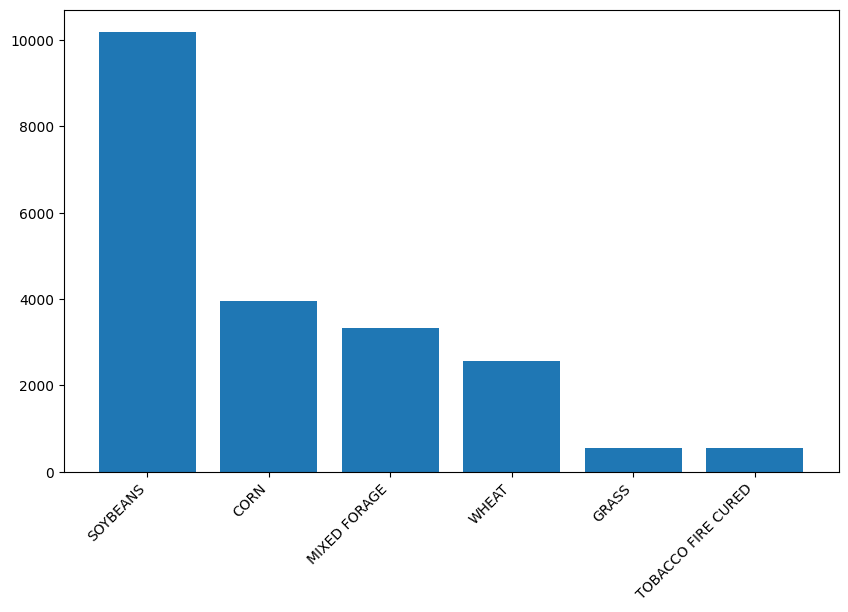

In [25]:
#create bar chart

plt.figure(figsize=(10,6))
plt.xticks(rotation=45, ha='right')
plt.bar(top_crops.index, top_crops.values)
plt.show()

In [26]:
# find top counties in KY (mean)

ky_county_mean = ky_crops.groupby('County')['Planted Acres'].mean().sort_values(ascending=False)

top_ct = 10
top_county = ky_county_mean.nlargest(n=top_ct)

top_county

County
Christian    4331.176471
Logan        3396.743243
Henderson    3285.096154
Union        3219.235294
Webster      2877.184211
Graves       2821.763158
Ballard      2425.578947
Todd         2408.954545
Lincoln      2406.483871
Ohio         2406.444444
Name: Planted Acres, dtype: float64

Chart Refinement

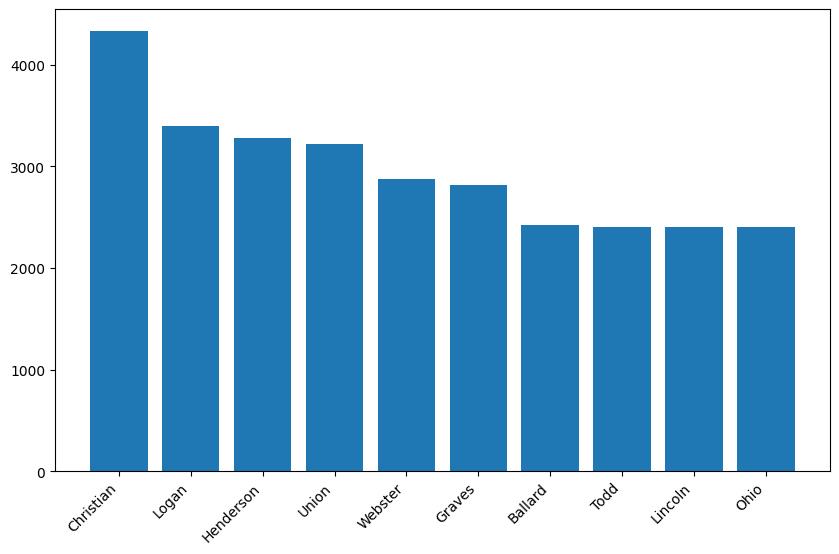

In [27]:
#create bar chart

plt.figure(figsize=(10,6))
plt.xticks(rotation=45, ha='right')
plt.bar(top_county.index, top_county.values)
plt.show()

In [28]:
# find top crops (sum)

ky_crop_sum = ky_crops.groupby('Crop')['Planted Acres'].sum().sort_values(ascending=False)

top_c = 6
top_crops = ky_crop_sum.nlargest(n=top_c)

top_crops


Crop
MIXED FORAGE    1861892
SOYBEANS        1661983
CORN            1494815
WHEAT            395594
GRASS            285594
CRP              207011
Name: Planted Acres, dtype: int64

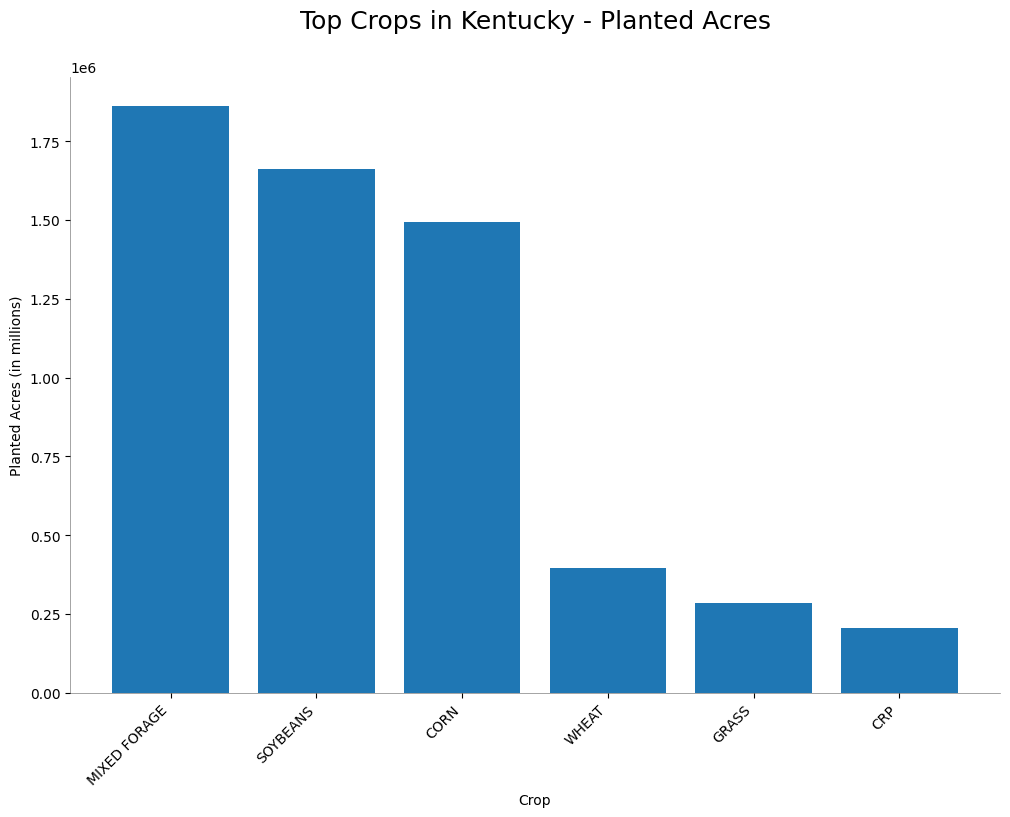

In [29]:
#create bar chart

plt.figure(figsize=(12,8))
plt.xlabel("Crop")
plt.ylabel("Planted Acres (in millions)")

ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(0.5)
    spine.set_alpha(0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title("Top Crops in Kentucky - Planted Acres", fontsize = 18, pad= 35)

plt.xticks(rotation=45, ha='right')
plt.bar(top_crops.index, top_crops.values)
plt.show()

In [30]:
# find top counties in KY (sum)

ky_county_sum = ky_crops.groupby('County')['Planted Acres'].sum().sort_values(ascending=False)

top_ct = 10
top_county = ky_county_sum.nlargest(n=top_ct)

top_county

County
Christian    294520
Logan        251359
Graves       214454
Daviess      181158
Henderson    170825
Union        164181
Todd         158991
Warren       137369
Barren       134810
Simpson      133113
Name: Planted Acres, dtype: int64

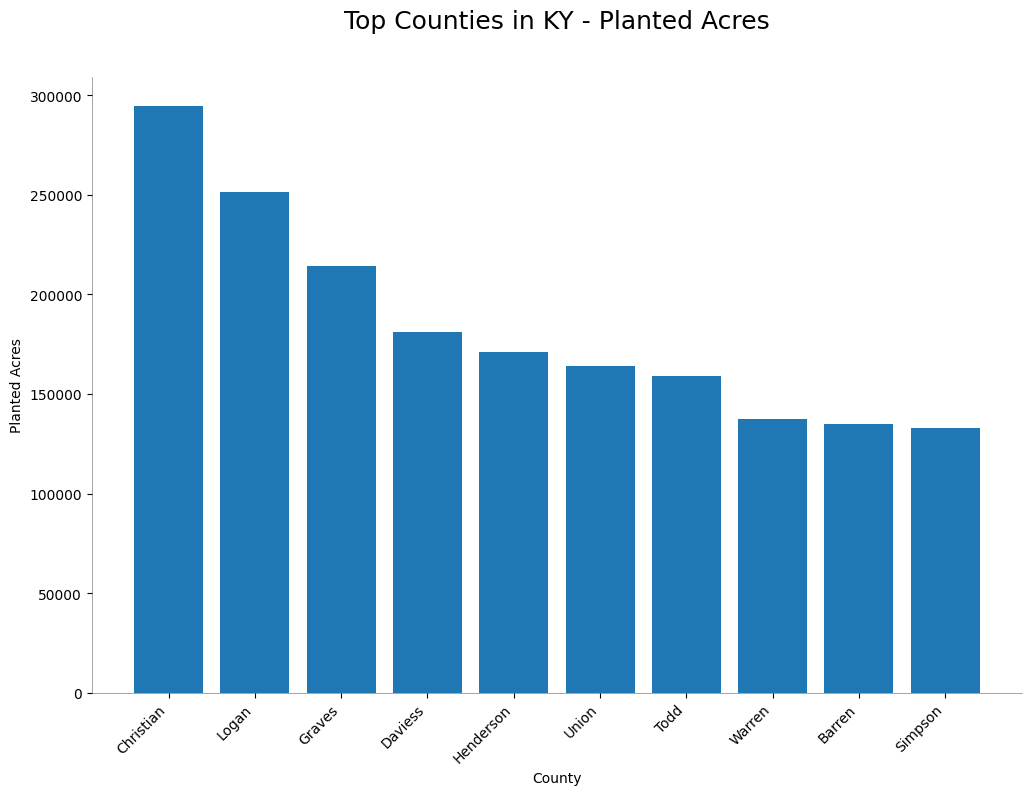

In [31]:
#create bar chart

plt.figure(figsize=(12,8))
plt.xlabel("County")
plt.ylabel("Planted Acres")

ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(0.5)
    spine.set_alpha(0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title("Top Counties in KY - Planted Acres", fontsize = 18, pad= 35)

plt.xticks(rotation=45, ha='right')
plt.bar(top_county.index, top_county.values)
plt.show()